In [2]:
# import stuff

import pandas
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.multioutput import MultiOutputClassifier
from sklearn.preprocessing import StandardScaler # For performing standardization of data
import seaborn as sns
import matplotlib.pyplot as plt
import joblib

In [3]:
# load in the data
socialMediaData = pandas.read_csv('./inputs/cleaned_train.csv')
socialMediaData

,Age,Daily_Usage_Time..minutes.,Posts_Per_Day,Likes_Received_Per_Day,Comments_Received_Per_Day,Messages_Sent_Per_Day,Female,Male,Non-binary,Instagram,...,LinkedIn,Whatsapp,Telegram,Snapchat,Happiness,Anger,Neutral,Anxiety,Boredom,Sadness
0,25,120,3,45,10,12,1,0,0,1,...,0,0,0,0,1,0,0,0,0,0
1,30,90,5,20,25,30,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
2,22,60,2,15,5,20,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,28,200,8,100,30,50,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4,33,45,1,5,2,10,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,33,85,4,35,18,18,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
996,22,70,1,14,6,10,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
997,35,110,3,50,25,25,0,1,0,0,...,0,1,0,0,1,0,0,0,0,0
998,28,60,2,18,8,18,0,0,1,0,...,0,0,1,0,0,1,0,0,0,0


In [ ]:
# split the data into X and Y and training and testing

Ycolumns = ['Happiness', 'Anger', 'Neutral', 'Anxiety', 'Boredom', 'Sadness']

X = socialMediaData.drop(Ycolumns, axis=1)
Y = socialMediaData[Ycolumns]

Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size=0.3, random_state=42) # random state makes the split deterministic. if random state = None, running the code multiple times will give different training and test sets

Y.sum(axis=0) # Display the number of each class in the dataset to check for over-inflation of a particular class.

Happiness    200
Anger        130
Neutral      200
Anxiety      170
Boredom      140
Sadness      160
dtype: int64

In [5]:
# Standardization of data attempt
# Note: Standardization caused high accuracy results that likely don't reflect the quality of the model
# and likely instead represent overfitting of the dataset.

# Performing standardization of the data
data_scaler = StandardScaler()

# Finding the mean and std. deviation of the train data
data_scaler.fit(Xtrain)

# # Performing the standardization on our data
Xtrain_standardized = data_scaler.transform(Xtrain)
Xtest_standardized = data_scaler.transform(Xtest)

print(f'Standardized X Training Data: {Xtrain_standardized}')
print(f'Standardized X Testing Data: {Xtest_standardized}')

Standardized X Training Data: [[-0.62812075  1.39772658  1.42577099 ... -0.3089687  -0.28912165
  -0.29773641]
 [ 0.86995258 -1.32511741 -1.24135807 ... -0.3089687  -0.28912165
  -0.29773641]
 [ 1.61898925  0.61977116  0.89234518 ... -0.3089687  -0.28912165
  -0.29773641]
 ...
 [ 0.6202737   2.04602277  1.42577099 ... -0.3089687  -0.28912165
  -0.29773641]
 [-0.87779963 -1.06579893 -1.24135807 ... -0.3089687  -0.28912165
  -0.29773641]
 [-1.37715741 -0.9361397  -0.70793226 ... -0.3089687  -0.28912165
  -0.29773641]]
Standardized X Testing Data: [[-0.87779963  0.23079344  0.35891937 ... -0.3089687  -0.28912165
  -0.29773641]
 [-0.12876297 -0.28784351  0.35891937 ... -0.3089687  -0.28912165
  -0.29773641]
 [ 0.86995258 -1.32511741 -1.24135807 ... -0.3089687  -0.28912165
  -0.29773641]
 ...
 [ 0.6202737  -0.15818427  0.35891937 ... -0.3089687  -0.28912165
  -0.29773641]
 [-0.87779963  0.36045268  1.42577099 ... -0.3089687  -0.28912165
  -0.29773641]
 [-1.37715741 -0.67682122 -0.70793226 .

In [19]:
# build the KNN model

# initialize the model
knn = KNeighborsClassifier(n_neighbors=3, weights='distance') # pick k value. 4 or 5 works good. more than 5 is overfitting
# wrap the model in a multiple model so it can handle multiple response variables
multipleKnn = MultiOutputClassifier(knn)
# run model on training data
multipleKnn.fit(Xtrain, Ytrain)

MultiOutputClassifier(estimator=KNeighborsClassifier(n_neighbors=3,
                                                     weights='distance'))

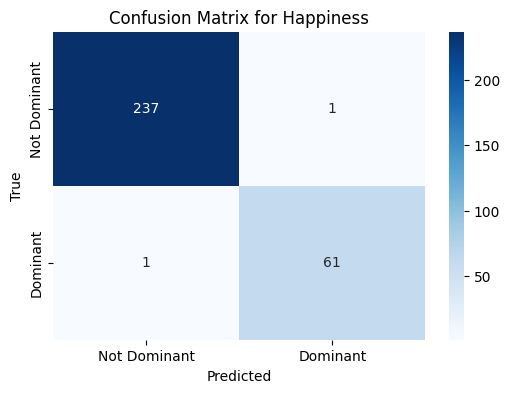

  Accuracy: 0.99
  Precision: 0.98
  Recall: 0.98
  F1 Score: 0.98


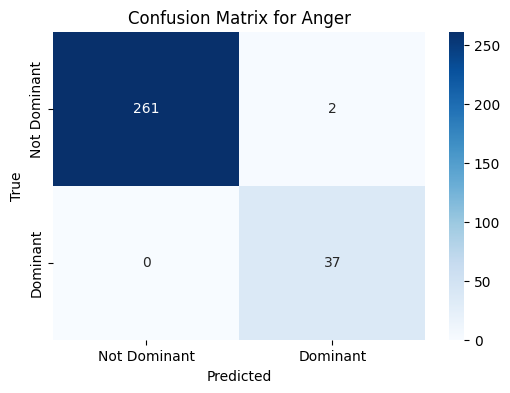

  Accuracy: 0.99
  Precision: 0.95
  Recall: 1.00
  F1 Score: 0.97


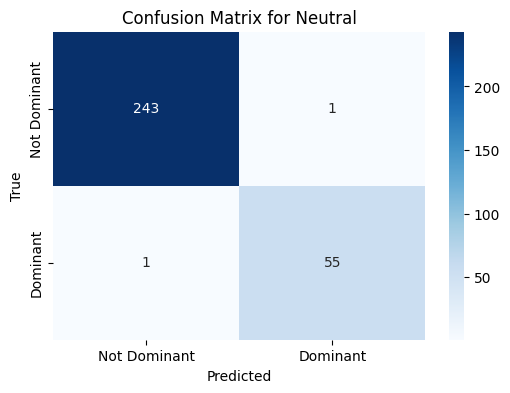

  Accuracy: 0.99
  Precision: 0.98
  Recall: 0.98
  F1 Score: 0.98


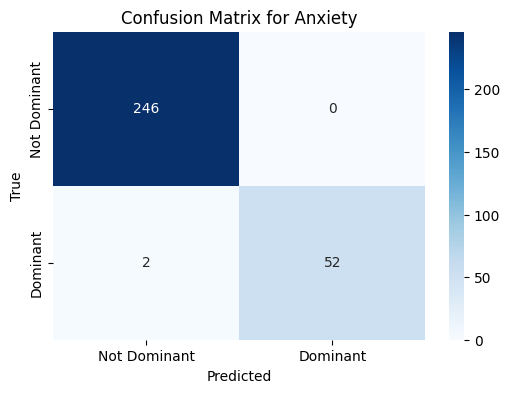

  Accuracy: 0.99
  Precision: 1.00
  Recall: 0.96
  F1 Score: 0.98


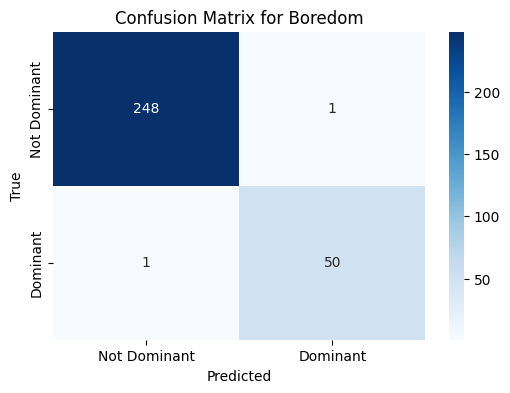

  Accuracy: 0.99
  Precision: 0.98
  Recall: 0.98
  F1 Score: 0.98


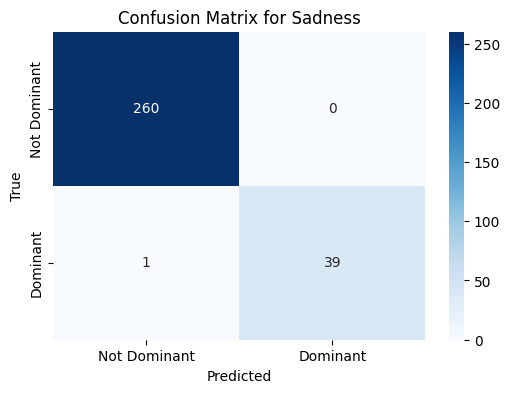

  Accuracy: 1.00
  Precision: 1.00
  Recall: 0.97
  F1 Score: 0.99
Cross-validation accuracy: 0.9742857142857144
Classification report for Happiness:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       238
           1       0.98      0.98      0.98        62

    accuracy                           0.99       300
   macro avg       0.99      0.99      0.99       300
weighted avg       0.99      0.99      0.99       300



Classification report for Anger:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       263
           1       0.95      1.00      0.97        37

    accuracy                           0.99       300
   macro avg       0.97      1.00      0.98       300
weighted avg       0.99      0.99      0.99       300



Classification report for Neutral:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       244
           1   

In [20]:
# make predictions

Ypredictions = multipleKnn.predict(Xtest)

num_targets = Ytest.shape[1]
for i in range(num_targets):
    cm = confusion_matrix(Ytest.iloc[:, i], Ypredictions[:, i])

    # Plot confusion matrix
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Dominant", "Dominant"], yticklabels=["Not Dominant", "Dominant"])
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(f'Confusion Matrix for {Ycolumns[i]}')
    plt.show()

    accuracy = accuracy_score(Ytest.iloc[:, i], Ypredictions[:, i])
    print(f"  Accuracy: {accuracy:.2f}")

    precision = precision_score(Ytest.iloc[:, i], Ypredictions[:, i], average='binary')
    print(f"  Precision: {precision:.2f}")
    
    recall = recall_score(Ytest.iloc[:, i], Ypredictions[:, i], average='binary')
    print(f"  Recall: {recall:.2f}")
    
    f1 = f1_score(Ytest.iloc[:, i], Ypredictions[:, i], average='binary')
    print(f"  F1 Score: {f1:.2f}")

scores = cross_val_score(multipleKnn, Xtrain, Ytrain, cv=5, scoring='accuracy')
print(f'Cross-validation accuracy: {scores.mean()}')

for column in Y.columns:
    print(f"Classification report for {column}:")
    print(classification_report(Ytest[column], Ypredictions[:, Y.columns.get_loc(column)]))
    print("\n")

    

In [8]:
# Export our trained model so that we can load it and use it later.
joblib.dump(multipleKnn, "./social-media-knn-model.pkl")

['./social-media-knn-model.pkl']

In [21]:
# Storing average values and column features for usage in model predictions in case users
# elect not to specify some information.

data_features = socialMediaData.columns.tolist()
data_features = data_features[:16]

age_avg = socialMediaData['Age'].mean()
daily_usage_avg = socialMediaData['Daily_Usage_Time..minutes.'].mean()
comments_avg = socialMediaData['Comments_Received_Per_Day'].mean()
daily_posts_avg = socialMediaData['Posts_Per_Day'].mean()
daily_messages_sent_avg = socialMediaData['Messages_Sent_Per_Day'].mean()
daily_likes_avg = socialMediaData['Likes_Received_Per_Day'].mean()

# Output the column names and averages to the file.
with open('averages.txt', 'w') as file:
    file.write("Feature Data:\n")
    file.write(",".join(data_features) + "\n")
    file.write(str(age_avg))
    file.write("," + str(daily_usage_avg))
    file.write("," + str(daily_posts_avg))
    file.write("," + str(daily_likes_avg))
    file.write("," + str(comments_avg))
    file.write("," + str(daily_messages_sent_avg))

In [22]:
# Performing some hypothesis testing.
# Hypothesis: Anxiety is the most dominant predicted emotion

from scipy.stats import chi2_contingency
predicted_output_totals = pandas.DataFrame(Ypredictions, columns=Ycolumns).sum()

# Assuming a uniform distribution, we need to have an expected frequency for each variable.
expected_frequencies = [sum(predicted_output_totals) / len(predicted_output_totals)] * len(predicted_output_totals)

# Print out the number of predictions of each test row for each class
print(predicted_output_totals)

# Peforming a Chi-Squared Test to evaluate our hypothesis regarding Anxiety as the dominant emotion.
chi2_stat, p_val, dof, expected = chi2_contingency([predicted_output_totals, expected_frequencies])
print(f'Chi-Square Statistical Results: {chi2_stat}, p-value: {p_val}')

Happiness    62
Anger        39
Neutral      56
Anxiety      52
Boredom      51
Sadness      39
dtype: int64
Chi-Square Statistical Results: 4.384838220491873, p-value: 0.4954379182636932


In [45]:
prob_preds = multipleKnn.predict_proba(Xtest) # Predicting the probabilities for each emotional state.

prob_results = pandas.DataFrame({
    'Feaure_Index: ': range(len(Xtest)),
    'Happiness': [prob[:, 1] for prob in prob_preds][0],
    'Anger': [prob[:, 1] for prob in prob_preds][1],
    'Neutral': [prob[:, 1] for prob in prob_preds][2],
    'Anxiety': [prob[:, 1] for prob in prob_preds][3],
    'Boredom': [prob[:, 1] for prob in prob_preds][4],
    'Sadness': [prob[:, 1] for prob in prob_preds][5]
})

most_likely_emotion = prob_results.iloc[:, 1:].idxmax(axis=1)
prob_results['Most_Likely_Emotion'] = most_likely_emotion

prob_results = pandas.concat([Xtest.reset_index(drop=True), prob_results], axis=1)
print(prob_results)

     Age  Daily_Usage_Time..minutes.  Posts_Per_Day  Likes_Received_Per_Day  \
0     24                         105              4                      35   
1     27                          85              4                      45   
2     31                          45              1                       9   
3     30                         175              6                      72   
4     26                          95              3                      30   
..   ...                         ...            ...                     ...   
295   27                         105              3                      48   
296   24                          55              1                      11   
297   30                          90              4                      43   
298   24                         110              6                      25   
299   22                          70              2                      42   

     Comments_Received_Per_Day  Messages_Sent_Per_D

# Analyzing the Probabilities
-----------

Age
21      Neutral
22      Neutral
23      Neutral
24        Anger
25    Happiness
26      Sadness
27      Boredom
28      Anxiety
29      Boredom
30        Anger
31      Sadness
32    Happiness
33    Happiness
34      Boredom
35      Boredom
dtype: object
    Dominant_Emotion_Prediction  Emotion_Prediction_Percentage
Age                                                           
21                      Neutral                       0.454545
22                      Neutral                       0.521739
23                      Neutral                       0.500000
24                        Anger                       0.296296
25                    Happiness                       0.588235
26                      Sadness                       0.521739
27                      Boredom                       0.243243
28                      Anxiety                       0.285714
29                      Boredom                       0.500000
30                        Anger                  

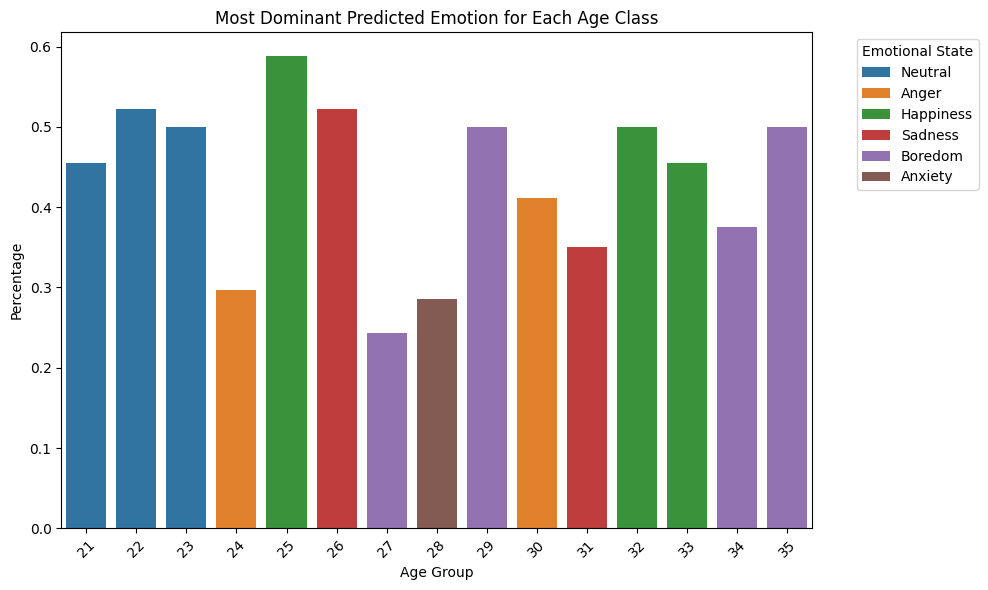

In [44]:
age_analysis = prob_results.groupby('Age')['Most_Likely_Emotion'].value_counts(normalize=True)
age_emotion_matrix = age_analysis.unstack(fill_value=0)
most_likely_emotion_per_age = age_emotion_matrix.idxmax(axis=1)
print(most_likely_emotion_per_age)

age_emotion_df = pandas.DataFrame({
    'Dominant_Emotion_Prediction': most_likely_emotion_per_age,
    'Emotion_Prediction_Percentage': age_emotion_matrix.max(axis=1)
})

print(age_emotion_df)

plt.figure(figsize=(10, 6))
sns.barplot(x=age_emotion_df.index, y='Emotion_Prediction_Percentage', hue='Dominant_Emotion_Prediction', data=age_emotion_df, dodge=False)
plt.title('Most Dominant Predicted Emotion for Each Age Class')
plt.ylabel('Percentage')
plt.xlabel('Age Group')
plt.legend(title='Emotional State', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()